<a href="https://colab.research.google.com/github/Akanksha546/Notebook3-CV-/blob/main/Unit4_harrisOperator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

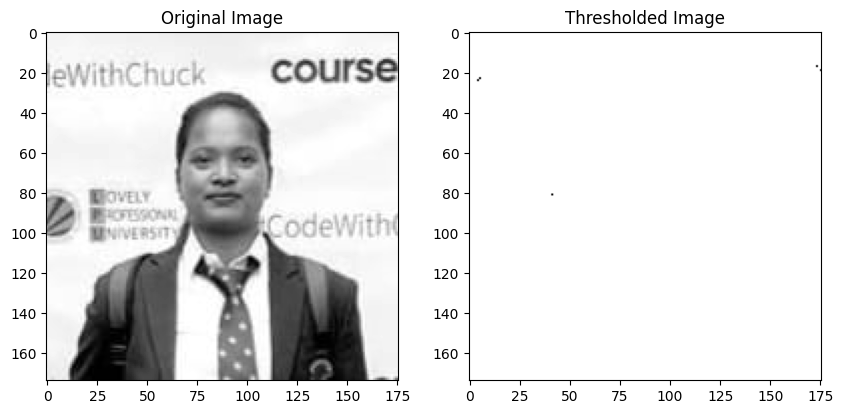

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image=cv2.imread('/content/WhatsApp Image 2024-05-05 at 10.20.54 PM.jpeg', cv2.IMREAD_GRAYSCALE)
hessian_xx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
hessian_yy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
hessian_xy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)

det_hessian = hessian_xx * hessian_yy - hessian_xy ** 2

det_hessian = cv2.normalize(det_hessian, None, 0, 255, cv2.NORM_MINMAX)
det_hessian = np.uint8(det_hessian)

_,thresh = cv2.threshold(det_hessian, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.show()



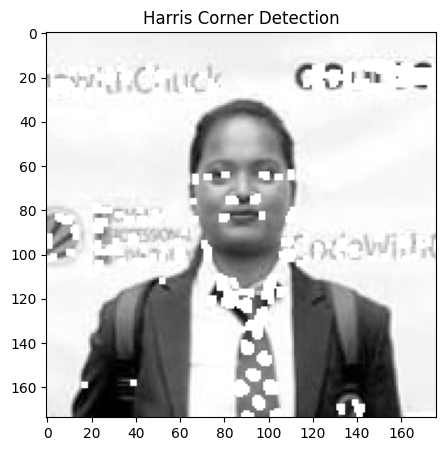

In [ ]:
#harris operator
import cv2
import numpy as np
from matplotlib import pyplot as plt
image=cv2.imread('/content/WhatsApp Image 2024-05-05 at 10.20.54 PM.jpeg', cv2.IMREAD_GRAYSCALE)
#convert image to float32
gray=np.float32(image)
harris_corners = cv2.cornerHarris(gray,blockSize=2,ksize=3,k=0.04) #apply harris corner detection
harris_corners = cv2.dilate(harris_corners, None) #dilate the detected corners to enhance them
image[harris_corners > 0.01 * harris_corners.max()]=[255] #threshold for an optimal value,marking the corners in the original image

plt.figure(figsize=(10,5))
plt.imshow(image, cmap='gray')
plt.title('Harris Corner Detection')
plt.show()